In [23]:
#import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [4]:
#load the titanic dataset from seaborn (library)
df=sns.load_dataset('titanic')

In [6]:
#calculate the number of missing values (n/a) in each column and prints the columns with missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
#calculates the mean age and then fills in the missing values in age column with the mean age value
df['age']=df['age'].fillna(df['age'].mean())

In [12]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])
df ['embark_town']= df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

In [13]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

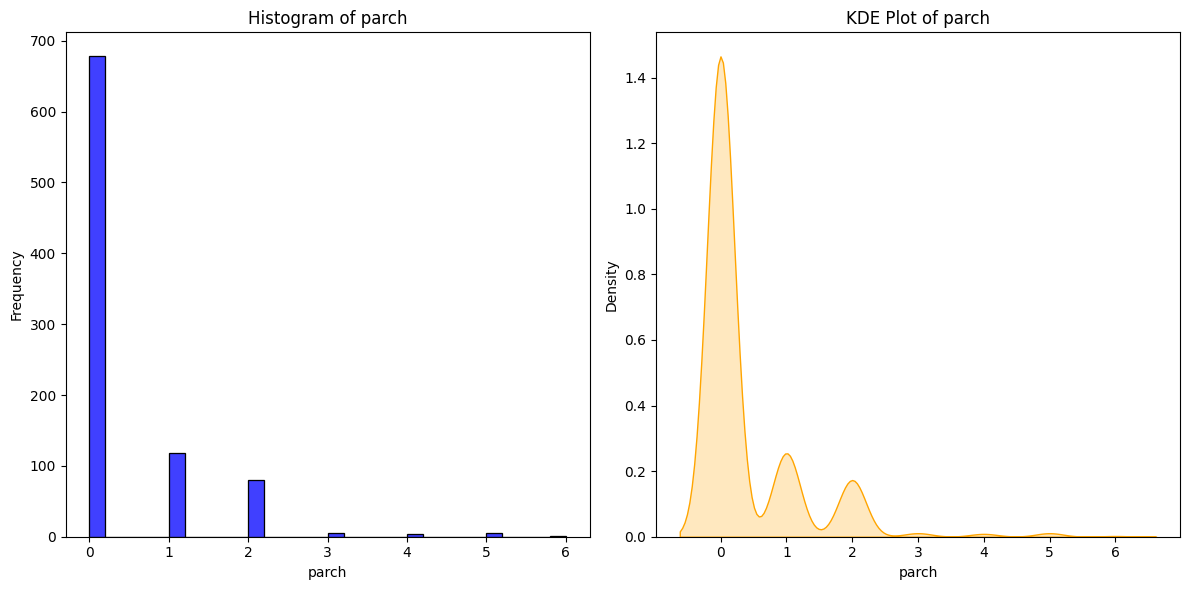

In [14]:
plt.figure(figsize=(12, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue',
edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')
# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

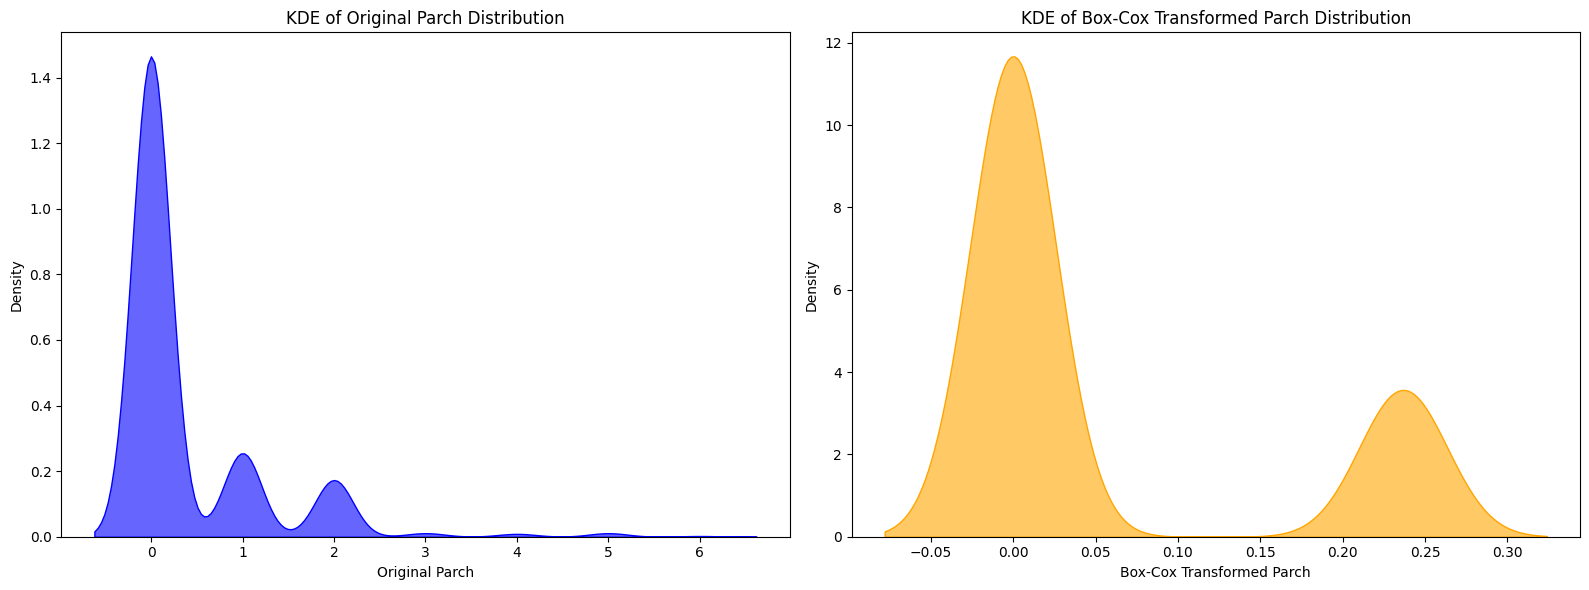

In [15]:
# from scipy import stats # incase you haven’t installed stats before
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1 # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])
# Step 3: Visualize the distributions using KDE
plt.figure(figsize=(16, 6))
# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')
# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [22]:
scaler = MinMaxScaler()
#apply Min-Max Scaling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age','fare']])

In [24]:
df.head()

survived  pclass     sex        age  sibsp  parch     fare embarked  class  \
0         0       3    male  29.699118      1      0   7.2500        S  Third   
1         1       1  female  29.699118      1      0  71.2833        C  First   
2         1       3  female  29.699118      0      0   7.9250        S  Third   
3         1       1  female  29.699118      1      0  53.1000        S  First   
4         0       3    male  29.699118      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  parch_shifted  \
0    man        True    C  Southampton    no  False              1   
1  woman       False    C    Cherbourg   yes  False              1   
2  woman       False    C  Southampton   yes   True              1   
3  woman       False    C  Southampton   yes  False              1   
4    man        True    C  Southampton    no   True              1   

   parch_boxcox  age_scaled  fare_scaled  
0           0.0         0.0     0.014151  
1           0.0         0.0     0.139136  
2           0.0         0.0     0.015469  
3           0.0         0.0     0.103644  
4           0.0         0.0     0.015713